# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


In [5]:
df.FormalEducation

0                                        Bachelor's degree
1                                          Master's degree
2                                          Master's degree
3                                          Master's degree
4                                          Doctoral degree
                               ...                        
26389                                      Master's degree
26390                                    Bachelor's degree
26391                                                  NaN
26392                               I prefer not to answer
26393    I did not complete any formal education past h...
Name: FormalEducation, Length: 26394, dtype: object

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [6]:
import flatiron_stats as fs

In [7]:
#Subset the data into 2 groups
subset = df[(~df["FormalEducation"].isnull()) & (~df["AdjustedCompensation"].isnull())]
s1 = subset[subset["FormalEducation"]=="Master's degree"]["AdjustedCompensation"]
s2 = subset[subset["FormalEducation"]=="Bachelor's degree"]["AdjustedCompensation"]

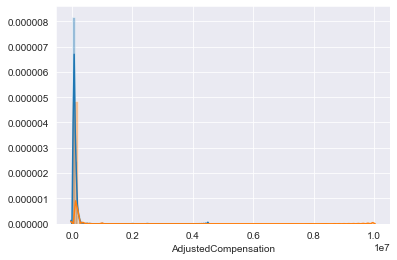

In [8]:
sns.distplot(s1)
sns.distplot(s2)

In [9]:
#Compare median, mean, sample size, Welch's t-test p-value
#in compensation for Master's degree and Bachelor's degree
print('Median:', 'Master:', s1.median(), 'Bachelor:', s2.median())
print('Mean:', 'Master:', s1.mean(), 'Bachelor:', s2.mean())
print('Sample Size:', 'Master:', len(s1), 'Bachelor:', len(s2))
print('p-values:', fs.p_value_welch_ttest(s1, s2, two_sided=False) )

Median: Master: 53812.17000000001 Bachelor: 38399.4
Mean: Master: 69139.89987120005 Bachelor: 64887.09799461879
Sample Size: Master: 1990 Bachelor: 1107
p-values: 0.33077639451272267


In [10]:
#Repeated Test with Outliers Removed
outlier_threshold = 500000
s1 = subset[(subset["FormalEducation"]=="Master's degree") & 
            (subset["AdjustedCompensation"]<=outlier_threshold)]["AdjustedCompensation"]
s2 = subset[(subset["FormalEducation"]=="Bachelor's degree") & 
            (subset["AdjustedCompensation"]<=outlier_threshold)]["AdjustedCompensation"]
print('Median:', 'Master:', s1.median(), 'Bachelor:', s2.median())
print('Mean:', 'Master:', s1.mean(), 'Bachelor:', s2.mean())
print('Sample Size:', 'Master:', len(s1), 'Bachelor:', len(s2))
print('p-values:', fs.p_value_welch_ttest(s1, s2, two_sided=False) )

Median: Master: 53539.72 Bachelor: 38292.15
Mean: Master: 63976.63281797891 Bachelor: 53744.35038988485
Sample Size: Master: 1985 Bachelor: 1103
p-values: 4.4874583271514723e-07


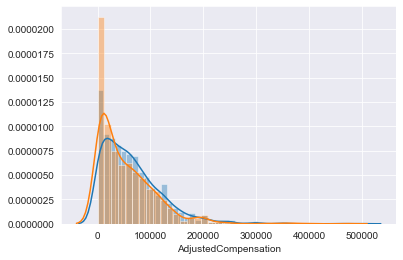

In [11]:
sns.distplot(s1)
sns.distplot(s2)

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [12]:
#Subset the data into 2 groups
subset = df[(~df["FormalEducation"].isnull()) & (~df["AdjustedCompensation"].isnull())]
s2 = subset[subset["FormalEducation"]=="Bachelor's degree"]["AdjustedCompensation"]
s3 = subset[subset["FormalEducation"]=="Doctoral degree"]["AdjustedCompensation"]
print('Median:', 'PhD:', s3.median(), 'Bachelor:', s2.median())
print('Mean:', 'PhD:', s3.mean(), 'Bachelor:', s2.mean())
print('Sample Size:', 'PhD:', len(s3), 'Bachelor:', len(s2))
print('p-values:', fs.p_value_welch_ttest(s3, s2, two_sided=False) )

Median: PhD: 74131.91999999997 Bachelor: 38399.4
Mean: PhD: 29566175.76245311 Bachelor: 64887.09799461879
Sample Size: PhD: 967 Bachelor: 1107
p-values: 0.1568238199472023


In [13]:
#Repeated Test with Outliers Removed
outlier_threshold = 500000
s3 = subset[(subset["FormalEducation"]=="Doctoral degree") & 
            (subset["AdjustedCompensation"]<=outlier_threshold)]["AdjustedCompensation"]
s2 = subset[(subset["FormalEducation"]=="Bachelor's degree") & 
            (subset["AdjustedCompensation"]<=outlier_threshold)]["AdjustedCompensation"]
print('Median:', 'PhD:', s3.median(), 'Bachelor:', s2.median())
print('Mean:', 'PhD:', s3.mean(), 'Bachelor:', s2.mean())
print('Sample Size:', 'PhD:', len(s3), 'Bachelor:', len(s2))
print('p-values:', fs.p_value_welch_ttest(s3, s2, two_sided=False) )

Median: PhD: 73152.77 Bachelor: 38292.15
Mean: PhD: 86194.98163085166 Bachelor: 53744.35038988485
Sample Size: PhD: 964 Bachelor: 1103
p-values: 0.0


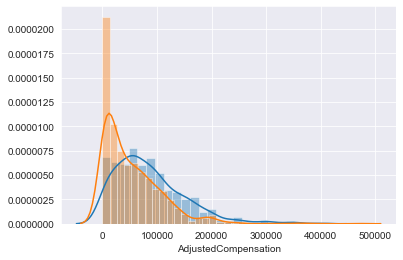

In [14]:
sns.distplot(s3)
sns.distplot(s2)

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, df). fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [16]:
#remove the outlier; limit to $500,000
limit_500k = df[df['AdjustedCompensation']<=500000]

formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, limit_500k). fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.841881e+11     6.0  29.224224  1.727132e-34
Residual            1.439270e+13  4320.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!